**APS | Parte 4: Teste de Hipótese**

Integrantes:
* Isabelle Da Silva Santos
* Livia Tanaka

In [203]:
# Bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [204]:
df_UE = pd.read_csv('dados_blocos\c7213e95-e23f-4682-a606-09cc46b20cbf_Data.csv')
df_OPEP = pd.read_csv('dados_blocos\ed5d4170-6c1e-41a5-83e1-a13aceb4814e_Data.csv')

filtro = ['Country Name', '2019 [YR2019]']
df_UE = df_UE[filtro]
df_OPEP = df_OPEP[filtro]


def classifica(df):
    classifica = []
    for i in range(len(df)):
        nivel = df.loc[i]['2019 [YR2019]'] 
        if nivel == '..':
            classifica.append('sem dados')
        elif float(nivel) <= 9.9:
            classifica.append('avancado')
        else:
            classifica.append('atrasado')

    df['classificacao'] = classifica
    return df

df_UE = classifica(df_UE)
df_OPEP = classifica(df_OPEP)

df_UE = df_UE[df_UE['2019 [YR2019]'] != '..'][0:25]
df_OPEP = df_OPEP[df_OPEP['2019 [YR2019]'] != '..'][0:7]

In [205]:
avancado_ue = df_UE[df_UE['classificacao'] =='avancado']
avancado_opep = df_OPEP[df_OPEP['classificacao'] =='avancado']


n_avancadoEue = len(avancado_ue)
n_avancadoEopep = len(avancado_opep)
n_avancado = n_avancadoEopep + n_avancadoEue


n_UE = len(df_UE)
n_OPEP = len(df_OPEP)
n_total = n_OPEP + n_UE

n_atrasado = n_total - n_avancado
P_atrasado = n_atrasado / n_total

P_avancado = n_avancado / n_total


In [206]:
# P(avançado|União Europeia)

P_avancadoEue = n_avancadoEue / n_total
P_UE = n_UE / n_total

P_avancado_dado_ue = P_avancadoEue/ P_UE
print(f'Probabilidade de um país da União Europeia ser avançado: {P_avancado_dado_ue}')

Probabilidade de um país da União Europeia ser avançado: 0.76


In [207]:
# P(avançado|OPEP)
P_avancadoEopep = n_avancadoEopep / n_total
P_OPEP = n_OPEP / n_total

P_avancado_dado_opep = P_avancadoEopep/ P_OPEP
print(f'Probabilidade de um país da Organização dos Países Exportadores de Petróleo ser avançado: {P_avancado_dado_opep}')

Probabilidade de um país da Organização dos Países Exportadores de Petróleo ser avançado: 0.0


Usando bootstrapping, calcule o intervalo de confiança de 90% para P(avançado|bloco) para cada bloco.

In [210]:
def bootstrapping(amostras, m):
    probabilidades = []
    for i in range(9999):
        amostras_ = np.random.choice(amostras, size=m, replace=True)
        p = 0
        for i in amostras_:

            if i <= 9.9:
                p += 1

        probabilidades.append(p/m)
    return probabilidades, np.percentile(probabilidades, 5), np.percentile(probabilidades, 95)

ue = [float(i) for i in df_UE['2019 [YR2019]']]
opep = [float(i) for i in df_OPEP['2019 [YR2019]']]

b_opep, l, h = bootstrapping(opep, len(opep))
print(f'Intervalo de confiança de {l} até {h}')

b_ue, l, h = bootstrapping(ue, len(ue))
print(f'Intervalo de confiança de {l} até {h}')

Intervalo de confiança de 0.0 até 0.0
Intervalo de confiança de 0.6 até 0.88


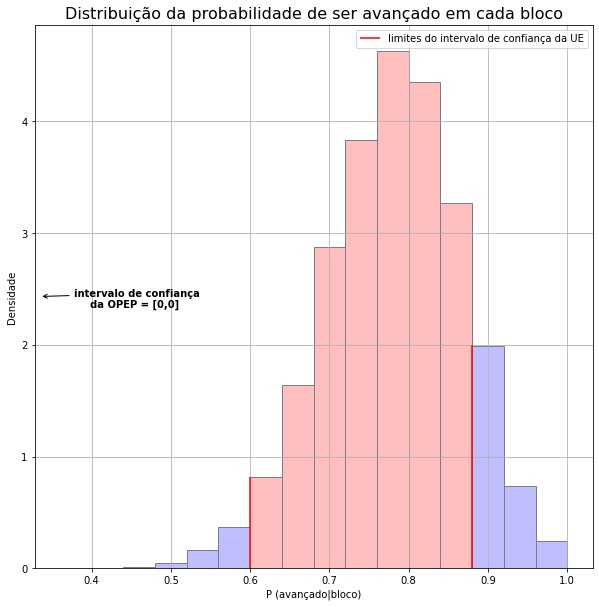

In [234]:
plt.figure()

p = sns.histplot(b_ue, bins=16, stat='density', fc=(0, 0, 1, 0.25), edgecolor="#7a7d89")

# anotações
plt.annotate('intervalo de confiança' ,xy=(0.01, 0.5), xycoords='axes fraction', fontsize=10, weight='bold', color='black',
                 xytext=(0.07, 0.5),  arrowprops=dict(arrowstyle="->", color='black'))
plt.annotate('da OPEP = [0,0]' ,xy=(0.1, 0.48), xycoords='axes fraction', fontsize=10, weight='bold', color='black')

# fonte: https://stackoverflow.com/questions/62737627/how-to-specify-the-color-for-a-partial-histogram-patch
for rectangle in p.patches:
    if rectangle.get_x() >= 0.6 and rectangle.get_x() < 0.88:
        rectangle.set_facecolor((1, 0, 0, 0.25))

# linhas dos limites
plt.vlines(0.6, 0, 0.8184, color='r', linestyles='solid',label='limites do intervalo de confiança da UE')
plt.vlines(0.88, 0, 2.0, color='r', linestyles='solid')

plt.title('Distribuição da probabilidade de ser avançado em cada bloco', fontsize=16)
plt.legend()
plt.ylabel('Densidade')
plt.xlabel('P (avançado|bloco)')
plt.show()

**ANÁLISE**

Anteriormente, foi estabelecido critério para classificar os países presentes na União Europeia (UE) e Organização dos Países Exportadores de Petróleo (OPEP) como “avançados” ou “atrasados”. Uma das ferramentas utilizadas para verificar sua operacionalidade no controle estatístico de qualidade foi o bootstrap. Por definição, o bootstrap [“estima a distribuição de amostragem que coleta várias amostras com reposição de uma amostra aleatória única. Essas amostras repetidas são chamadas reamostras. Cada reamostra é do mesmo tamanho da amostra original”](https://support.minitab.com/pt-br/minitab/20/help-and-how-to/probability-distributions-random-data-and-resampling-analyses/supporting-topics/resampling-analyses/what-is-bootstrapping/). 

A partir de cada uma dessas reamostragens foi calculada a probabilidade de um elemento da reamostra ser avançado dado que ele pertence ao seu respectivo bloco. Baseado nesse conjunto de probabilidades, foi determinado um intervalo de confiança de 90% ao definir os limites como o percentil de 5% e o outro de 95%. Dessa forma, enquanto o intervalo da UE foi de 0.6 a 0.88, o da OPEP foi de 0 a 0.

Ao analisar os resultados obtidos através do bootstrap, é possível notar que não há sobreposição dos intervalos de confiança. Essa disparidade entre os limites ocorreu devido ao fato de que na OPEP não há países classificados como “avançados”, ou seja, a probabilidade calculada sempre resultará em 0. Assim, podemos inferir com segurança que os países da UE são tipicamente mais “avançados” que os da OPEP em relação ao indicador escolhido. 


**APS | Parte 3: Distribuições**

**Tabela indicando quais foram as modificações feitas na entrega anterior para contemplar o feedback que foi recebido:**

**FEEDBACK** 

Comentarios 1: "Faltou calcular P(bloco | não-avançado)"



In [214]:
# Calculo do P(bloco | não-avançado)

# P( União Europeia | não-avançado )
n_atrasadoEue = n_UE - n_avancadoEue
P_atrasadoEue = n_atrasadoEue / n_total
P_ue_dado_atrasado = P_atrasadoEue/ P_atrasado
print('P( União Europeia | não-avançado ) = ', P_ue_dado_atrasado)

# P( OPEP | não-avançado )
n_atrasadoEopep = n_OPEP - n_avancadoEopep
P_atrasadoEopep = n_atrasadoEopep / n_total
P_opep_dado_atrasado = P_atrasadoEopep/ P_atrasado
print('P( OPEP | não-avançado ) = ', P_opep_dado_atrasado)

P( União Europeia | não-avançado ) =  0.46153846153846156
P( OPEP | não-avançado ) =  0.5384615384615384
